# Analysis on Chicago Food Inspection

----

Data Source: https://www.kaggle.com/chicago/chi-restaurant-inspections

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
#Get the data that was downloaded
data = pd.read_csv('./datasets/Food_Inspections.csv')

### Helper to always download updated dataset

In [3]:
download='https://www.kaggle.com/chicago/chi-restaurant-inspections/downloads/chi-restaurant-inspections.zip'
path = os.path.join('datasets', 'Food-Inspection')

In [4]:
os.path.isdir('d')

False

In [13]:
data

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616,08/28/2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607,08/28/2017,License,Not Ready,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638,Special Event,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607,08/28/2017,License Re-Inspection,Not Ready,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616,08/28/2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639,08/28/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"
5,2079104,SHRIMP'S FISH CHICKEN,SHRIMP'S FISH CHICKEN,2549497,Restaurant,Risk 2 (Medium),4355 S COTTAGE GROVE AVE,CHICAGO,IL,60653,08/28/2017,License,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.815197,-87.606531,"(41.81519729173754, -87.60653088909952)"
6,2079091,ART'S DRIVE INN,ART'S DRIVE INN,64682,Restaurant,Risk 1 (High),1333 W NORTH AVE,CHICAGO,IL,60622,08/25/2017,Canvass,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.910601,-87.661863,"(41.910600662840906, -87.66186347385191)"
7,2079087,VINCENT,VINCENT,51614,Restaurant,Risk 1 (High),1475 W BALMORAL AVE,CHICAGO,IL,60640,08/25/2017,Complaint,Fail,12. HAND WASHING FACILITIES: WITH SOAP AND SAN...,41.979744,-87.667738,"(41.979744137415764, -87.6677375923677)"
8,2079083,CAPTAIN HOOKS OF DAN RYAN,CAPTAIN HOOKS OF DAN RYAN,2192934,Restaurant,Risk 2 (Medium),205 W 87TH ST,CHICAGO,IL,60620,08/25/2017,Complaint Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.736030,-87.629095,"(41.73603017519755, -87.6290945085756)"
9,2079036,JIBARITO'S Y MAS,JIBARITO'S Y MAS,2452249,Restaurant,Risk 1 (High),3400 W FULLERTON AVE,CHICAGO,IL,60647,08/25/2017,Canvass,Out of Business,NaN,41.924770,-87.712170,"(41.92476960356357, -87.71216993271977)"


In [6]:
data.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

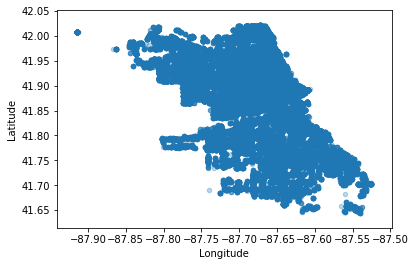

In [7]:
data.plot.scatter(x = 'Longitude', y='Latitude', alpha=0.3)

# Clean Data

In [8]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268.0,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607.0,08/28/2017,License,Not Ready,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638.0,Special Event,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607.0,08/28/2017,License Re-Inspection,Not Ready,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639.0,08/28/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"


### Fix Zips

In [9]:
#Fix zips into ints
data['Zip'].fillna(0,inplace=True)
data['Zip'] = data['Zip'].apply(lambda l: int(l))

In [10]:
#Fix Licenses into ints
data['License #'].fillna(0, inplace=True)
data['License #'] =data['License #'].map(int)

In [11]:
data['Risk'].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All', nan], dtype=object)

In [12]:
data.head(10)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616,08/28/2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607,08/28/2017,License,Not Ready,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638,Special Event,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607,08/28/2017,License Re-Inspection,Not Ready,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616,08/28/2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639,08/28/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"
5,2079104,SHRIMP'S FISH CHICKEN,SHRIMP'S FISH CHICKEN,2549497,Restaurant,Risk 2 (Medium),4355 S COTTAGE GROVE AVE,CHICAGO,IL,60653,08/28/2017,License,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.815197,-87.606531,"(41.81519729173754, -87.60653088909952)"
6,2079091,ART'S DRIVE INN,ART'S DRIVE INN,64682,Restaurant,Risk 1 (High),1333 W NORTH AVE,CHICAGO,IL,60622,08/25/2017,Canvass,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.910601,-87.661863,"(41.910600662840906, -87.66186347385191)"
7,2079087,VINCENT,VINCENT,51614,Restaurant,Risk 1 (High),1475 W BALMORAL AVE,CHICAGO,IL,60640,08/25/2017,Complaint,Fail,12. HAND WASHING FACILITIES: WITH SOAP AND SAN...,41.979744,-87.667738,"(41.979744137415764, -87.6677375923677)"
8,2079083,CAPTAIN HOOKS OF DAN RYAN,CAPTAIN HOOKS OF DAN RYAN,2192934,Restaurant,Risk 2 (Medium),205 W 87TH ST,CHICAGO,IL,60620,08/25/2017,Complaint Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.736030,-87.629095,"(41.73603017519755, -87.6290945085756)"
9,2079036,JIBARITO'S Y MAS,JIBARITO'S Y MAS,2452249,Restaurant,Risk 1 (High),3400 W FULLERTON AVE,CHICAGO,IL,60647,08/25/2017,Canvass,Out of Business,NaN,41.924770,-87.712170,"(41.92476960356357, -87.71216993271977)"
